In [2]:
#기본
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분리
from sklearn.model_selection import train_test_split

In [3]:
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info() # 결측치 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# 인코딩딩
df['sex'].value_counts() # 레이블 인코딩 전 데이터 개수 확인

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [7]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder # data == object에 대하여 레이블 인코딩딩

encoder = LabelEncoder()
for col in df.columns[df.dtypes == 'object']:
    df[col] = encoder.fit_transform(df[col]) # 레이블 인코딩

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('bmi', axis=1) # 독립변수
y= df['bmi']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape

(1070, 6)

In [11]:
from keras.models import Sequential  # keras regression  # 임의 값 예측 
from keras.layers import Dense

model = Sequential()
model.add(Dense(6, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation=None))
model.compile( optimizer='adam', loss='mse', metrics=['mae','mse'])

model.summary()

c:\Users\outla\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,411 (9.42 KB)

 Trainable params: 2,411 (9.42 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=40, validation_data= (X_test,y_test))

Epoch 1/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 27967.2598 - mae: 107.1896 - mse: 27967.2598 - val_loss: 4749.2627 - val_mae: 43.3009 - val_mse: 4749.2627
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2858.7673 - mae: 38.0820 - mse: 2858.7673 - val_loss: 545.8006 - val_mae: 21.2710 - val_mse: 545.8006
Epoch 3/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 586.2066 - mae: 21.9840 - mse: 586.2066 - val_loss: 547.0304 - val_mae: 21.3041 - val_mse: 547.0304
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 498.3386 - mae: 20.0658 - mse: 498.3386 - val_loss: 577.6203 - val_mae: 21.5345 - val_mse: 577.6203
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 537.8739 - mae: 20.8140 - mse: 537.8739 - val_loss: 569.4826 - val_mae: 21.5841 - val_mse: 569.4826
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 507.9938 - mae: 20.1897 - mse: 507.9938 - val_loss: 536.8564 - val_mae: 21.0826 - val_mse: 536.8564
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5

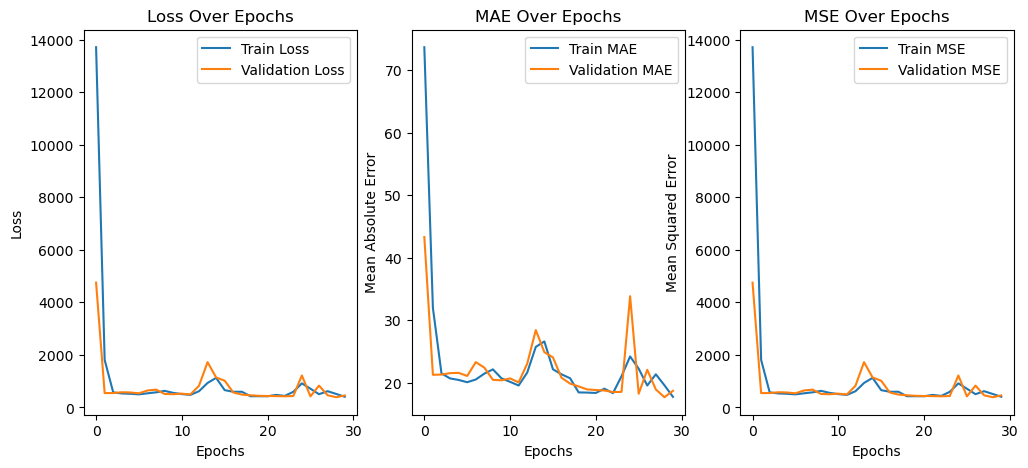

In [13]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']
mse = history.history['mse']
val_mse = history.history['val_mse']

# 그래프 그리기
plt.figure(figsize=(12, 5))

# Loss 시각화
plt.subplot(1, 3, 1)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Mean Absolute Error 시각화
plt.subplot(1, 3, 2)
plt.plot(mae, label='Train MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE Over Epochs')
plt.legend()

# Mean Squared Error 시각화
plt.subplot(1, 3, 3)
plt.plot(mse, label='Train MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Epochs')
plt.legend()

plt.show()

In [14]:
y_pred = model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [15]:
mse = np.mean((y_test - y_pred.flatten())**2)
print("Test MSE:", mse)

Test MSE: 455.3122657739292


In [16]:
from sklearn.metrics import r2_score
print("R2 Score: ", r2_score(y_test, y_pred)) # 결정계수

R2 Score:  -10.488946815782613
